<a href="https://colab.research.google.com/github/TomMcIver/Q-Stock/blob/Data/Q_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Install Required Packages
try:
    import numpy as np
    import pandas as pd
    from scipy.stats import norm
except ImportError as e:
    print(f"Error importing packages: {e}")
    !pip install numpy pandas scipy
    import numpy as np
    import pandas as pd
    from scipy.stats import norm

print("✅ Packages installed successfully")

✅ Packages installed successfully


Generated stock prices:
               Stock_1     Stock_2     Stock_3     Stock_4    Stock_5
2023-01-01  105.435695  189.876104  156.179781  137.867733  74.311066
2023-01-02  105.248190  189.163180  151.627739  136.613496  74.372052
2023-01-03  104.412884  186.191956  149.033419  136.355096  73.895773
2023-01-04  105.685956  192.497226  147.712028  136.455671  73.315537
2023-01-05  105.805141  187.040355  142.407322  135.878857  73.590571

Starting parameters for each stock:
Stock_1: Start=$106.18, μ=-0.053, σ=0.106, q=0.009
Stock_2: Start=$192.61, μ=-0.083, σ=0.391, q=0.015
Stock_3: Start=$159.80, μ=0.160, σ=0.350, q=0.026
Stock_4: Start=$139.80, μ=0.080, σ=0.164, q=0.022
Stock_5: Start=$73.40, μ=0.112, σ=0.155, q=0.015


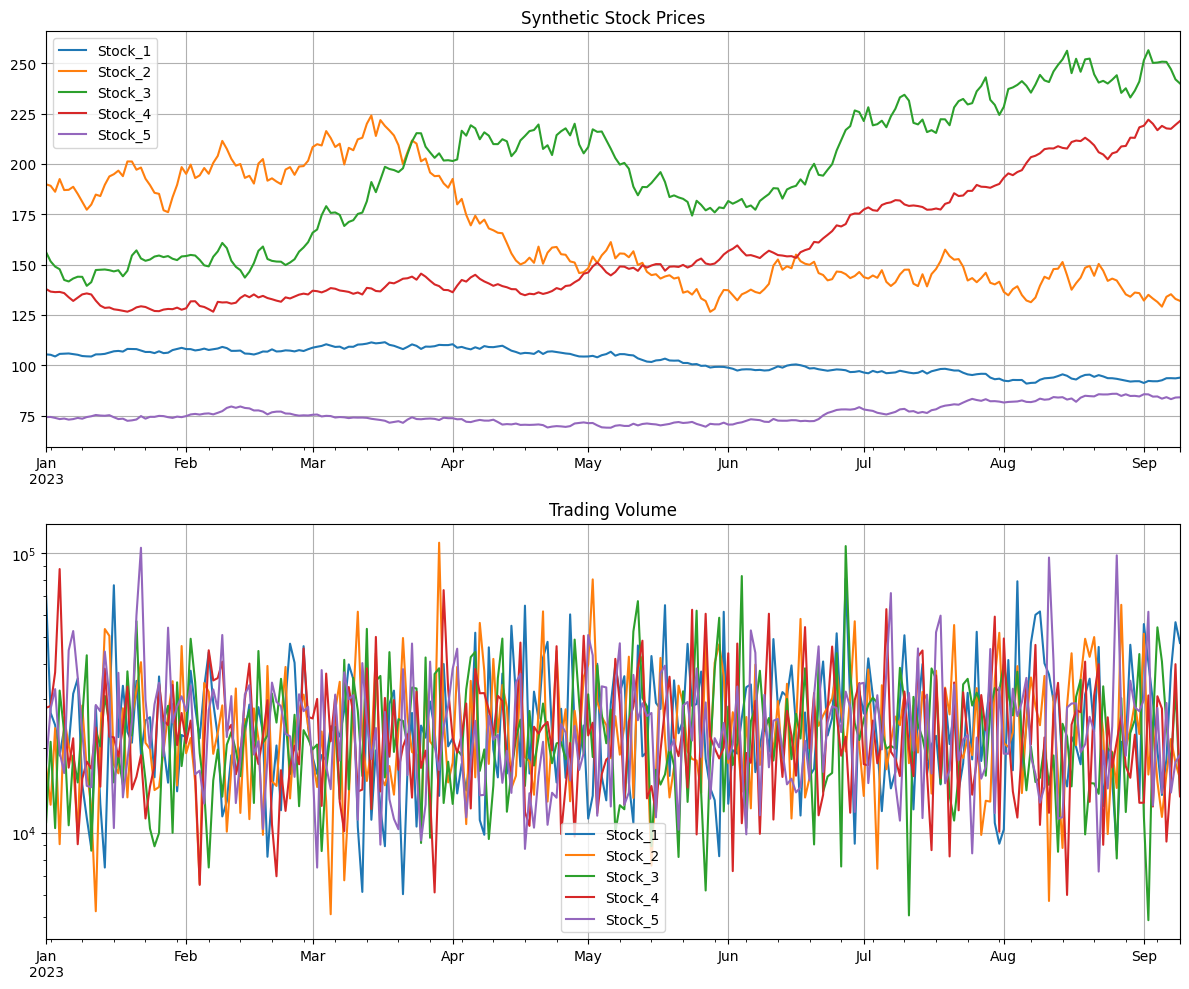

In [12]:
# Cell 2: Generate Synthetic Stock Prices (Enhanced GBM)
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    np.random.seed(42)
    days = 252  # Trading days
    stocks = 5  # Number of stocks

    # Generate initial parameters
    start_prices = np.random.uniform(50, 200, stocks)
    mu = np.random.uniform(-0.1, 0.2, stocks)          # Drifts
    sigma = np.random.uniform(0.1, 0.4, stocks)        # Volatilities
    dividend_yield = np.random.uniform(0.0, 0.05, stocks)  # Dividend yields

    # Create correlation matrix (positive definite)
    corr_matrix = np.array([
        [1.00, 0.75, 0.30, -0.20, 0.15],
        [0.75, 1.00, 0.40, -0.10, 0.25],
        [0.30, 0.40, 1.00, 0.25, 0.10],
        [-0.20, -0.10, 0.25, 1.00, 0.05],
        [0.15, 0.25, 0.10, 0.05, 1.00]
    ])

    # Cholesky decomposition for correlated Brownian motion
    L = np.linalg.cholesky(corr_matrix)

    # Initialize DataFrames
    dates = pd.date_range(start="2023-01-01", periods=days)
    prices = pd.DataFrame(index=dates)
    volume = pd.DataFrame(index=dates)
    dividends = pd.DataFrame(index=dates)

    # Generate correlated random shocks
    uncorrelated_shocks = np.random.normal(0, 1, (days, stocks))
    correlated_shocks = uncorrelated_shocks @ L.T

    # GBM Simulation with dividends and volume
    for i in range(stocks):
        dt = 1/days
        shock = correlated_shocks[:, i] * np.sqrt(dt)

        # Adjusted returns with dividend yield
        returns = (mu[i] - dividend_yield[i] - 0.5*sigma[i]**2)*dt + sigma[i]*shock
        prices[f'Stock_{i+1}'] = start_prices[i] * np.exp(returns.cumsum())

        # Generate trading volume (log-normal distribution)
        volume[f'Stock_{i+1}'] = np.random.lognormal(mean=10, sigma=0.5, size=days)

        # Generate dividend payments (quarterly)
        dividend_days = np.arange(63, days, 63)  # Every ~3 months
        dividend_amounts = prices[f'Stock_{i+1}'].iloc[dividend_days] * dividend_yield[i]
        dividends[f'Stock_{i+1}'] = pd.Series(dividend_amounts.values, index=dates[dividend_days])

    print("Generated stock prices:")
    print(prices.head())

    print("\nStarting parameters for each stock:")
    for i in range(stocks):
        print(f"Stock_{i+1}: Start=${start_prices[i]:.2f}, μ={mu[i]:.3f}, σ={sigma[i]:.3f}, q={dividend_yield[i]:.3f}")

    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    prices.plot(ax=ax1, title="Synthetic Stock Prices")
    ax1.grid(True)

    volume.plot(ax=ax2, title="Trading Volume")
    ax2.set_yscale('log')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Error generating stock prices: {e}")
    if 'L' in locals():
        print("Check if correlation matrix is positive definite!")


Generated portfolio returns:
             Asset_1   Asset_2   Asset_3   Asset_4
2023-01-01  0.024836  0.015721  0.035268  0.072720
2023-01-02 -0.011708 -0.016390  0.065687  0.077142
2023-01-03 -0.023474 -0.002502 -0.021030 -0.024286
2023-01-04  0.012098 -0.047720 -0.100874 -0.084182
2023-01-05 -0.050642 -0.031086 -0.052586 -0.069932


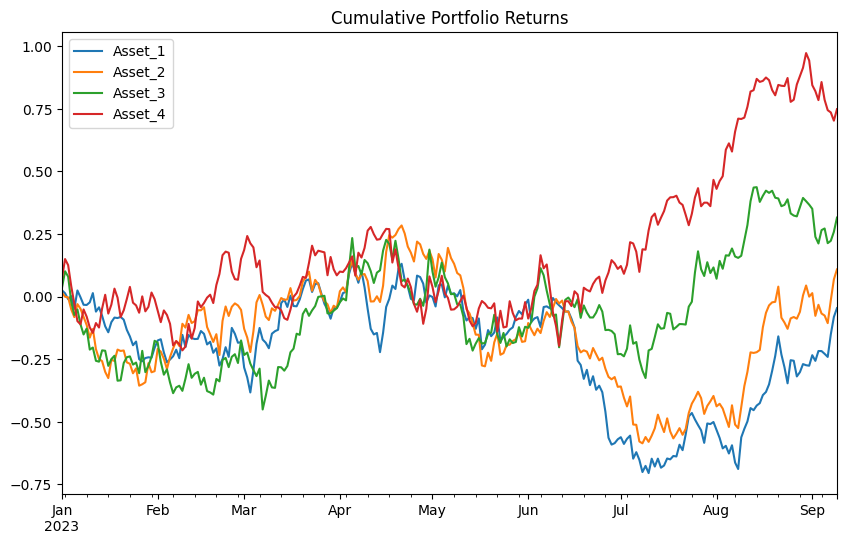

In [8]:

try:

    np.random.seed(42)
    n_assets = 4
    n_days = 252


    corr_matrix = np.array([[1.0, 0.8, 0.3, -0.2],
                           [0.8, 1.0, 0.4, -0.1],
                           [0.3, 0.4, 1.0, 0.5],
                           [-0.2, -0.1, 0.5, 1.0]])

    # decomposition
    L = np.linalg.cholesky(corr_matrix)

    uncorrelated_returns = np.random.normal(0, 0.05, (n_days, n_assets))

    correlated_returns = uncorrelated_returns @ L.T

    portfolio_returns = pd.DataFrame(correlated_returns,
                                   index=pd.date_range("2023-01-01", periods=n_days),
                                   columns=[f'Asset_{i+1}' for i in range(n_assets)])

    print("\nGenerated portfolio returns:")
    print(portfolio_returns.head())
    portfolio_returns.cumsum().plot(title="Cumulative Portfolio Returns", figsize=(10,6))

except Exception as e:
    print(f"❌ Error generating portfolio returns: {e}")
    if 'L' in locals():
        print(f"Possible issue with Cholesky decomposition. Matrix positive definite?")

In [9]:

try:

    np.random.seed(42)
    n_options = 1000
    S = np.random.uniform(50, 200, n_options)
    K = S * np.random.uniform(0.8, 1.2, n_options)
    T = np.random.uniform(0.1, 2, n_options)
    r = np.random.uniform(0.01, 0.05, n_options)
    sigma = np.random.uniform(0.1, 0.6, n_options)

    # black scholes calculation
    def black_scholes(S, K, T, r, sigma):
        d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        call_price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        return call_price


    option_prices = black_scholes(S, K, T, r, sigma)


    options_df = pd.DataFrame({
        'Spot': S,
        'Strike': K,
        'Maturity': T,
        'Rate': r,
        'Volatility': sigma,
        'Call_Price': option_prices
    })

    print("\nGenerated option pricing data:")
    print(options_df.head())

except Exception as e:
    print(f"❌ Error generating option data: {e}")
    if 'sigma' in locals():
        print(f"Check for zero volatility values? Found min: {sigma.min()}")


Generated option pricing data:
         Spot      Strike  Maturity      Rate  Volatility  Call_Price
0  106.181018   92.807855  0.597241  0.036908    0.385998   20.933577
1  192.607146  195.835315  0.569260  0.041867    0.502716   29.564091
2  159.799091  183.637654  1.821884  0.020019    0.480080   34.676737
3  139.798773  152.784674  0.574138  0.034995    0.176950    3.757688
4   73.402796   82.403774  0.616704  0.032870    0.174625    1.517597


In [10]:
# credit risk
try:
    np.random.seed(42)
    n_customers = 500


    credit_scores = np.random.normal(650, 100, n_customers).astype(int)
    income = np.random.lognormal(4, 0.5, n_customers).astype(int)
    debt_ratio = np.random.beta(2, 5, n_customers)
    loan_amount = np.random.uniform(5000, 500000, n_customers).astype(int)


    default_prob = 1 / (1 + np.exp(-(-0.00001*loan_amount + 0.02*credit_scores - 3*debt_ratio)))
    default = np.random.binomial(1, default_prob)


    credit_df = pd.DataFrame({
        'Credit_Score': np.clip(credit_scores, 300, 850),
        'Income': income,
        'Debt_Ratio': debt_ratio,
        'Loan_Amount': loan_amount,
        'Default': default
    })

    print("\nGenerated credit risk data:")
    print(credit_df.head())
    print(f"\nDefault rate: {credit_df['Default'].mean():.2%}")

except Exception as e:
    print(f"❌ Error generating credit data: {e}")


Generated credit risk data:
   Credit_Score  Income  Debt_Ratio  Loan_Amount  Default
0           699      86    0.376510       372112        1
1           636     141    0.338881       248821        1
2           714      27    0.334857       244174        1
3           802      72    0.439946       419924        1
4           626      39    0.497788       183894        1

Default rate: 99.80%


In [11]:

try:
    np.random.seed(42)
    n_articles = 200

# sentiment Data
    positive_templates = [
        "{} surges on strong earnings report",
        "Analysts bullish on {} growth prospects",
        "{} announces breakthrough innovation in {}"
    ]

    negative_templates = [
        "{} plunges amid regulatory concerns",
        "Short sellers target {} over {} issues",
        "{} CEO resigns unexpectedly"
    ]


    companies = ['TechCorp', 'FinGlobal', 'BioHealth', 'EnergyPlus']
    topics = ['AI', 'blockchain', 'biotech', 'renewables']

    articles = []
    sentiments = []

    for _ in range(n_articles):
        if np.random.rand() > 0.4:
            template = np.random.choice(positive_templates)
            sentiment = 1
        else:
            template = np.random.choice(negative_templates)
            sentiment = 0

        company = np.random.choice(companies)
        topic = np.random.choice(topics)
        article = template.format(company, topic)

        articles.append(article)
        sentiments.append(sentiment)


    sentiment_df = pd.DataFrame({
        'Headline': articles,
        'Sentiment': sentiments
    })

    print("\nGenerated market sentiment data:")
    print(sentiment_df.head())
    print(f"\nSentiment distribution:\n{sentiment_df['Sentiment'].value_counts()}")

except Exception as e:
    print(f"❌ Error generating sentiment data: {e}")


Generated market sentiment data:
                                         Headline  Sentiment
0      BioHealth plunges amid regulatory concerns          0
1      BioHealth surges on strong earnings report          1
2              BioHealth CEO resigns unexpectedly          0
3              FinGlobal CEO resigns unexpectedly          0
4  Analysts bullish on FinGlobal growth prospects          1

Sentiment distribution:
Sentiment
1    115
0     85
Name: count, dtype: int64
